# Data Cleanup

## CSV Reading & Data Wrangling 

In [25]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

#here, we will pull in the 3 CSV's of the PCS data, each file has anonymized data related to patient records at mental health treatment facilities 
filepath2013 = "Resources/Patient_Characteristics_Survey__PCS___2013.csv"
filepath2015 = "Resources/Patient_Characteristics_Survey__PCS___2015.csv"
filepath2017 = "Resources/Patient_Characteristics_Survey__PCS___2017.csv"
#converting file to DF 
pcs_df_2013 = pd.read_csv(filepath2013)
pcs_df_2015 = pd.read_csv(filepath2015)
pcs_df_2017 = pd.read_csv(filepath2017)
#isolating df's with factor attributes (qualitative)
pcs_2015_factors = pcs_df_2015[['Intellectual Disability','Autism Spectrum','Other Developmental Disability','Alcohol Related Disorder','Drug Substance Disorder', 'Mobility Impairment Disorder', 'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease', 'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease', 'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition', 'Unknown Chronic Med Condition', 'Smokes', 'Received Smoking Medication', 'Received Smoking Counseling']]
pcs_2013_factors = pcs_df_2013[['Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disabilities', 'Alcohol Related Disorder',
       'Drug Substance Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure',
       'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac',
       'Pulmonary/Asthma', 'Alzheimer or Dementia', 'Kidney Disease',
       'Liver Disease', 'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'No Chronic Med. Condition', 'Unknown Chronic Med. Condition', 'Smokes',
       'Receives Smoking Medication', 'Receives Smoking Counseling']]
pcs_2017_factors = pcs_df_2017[['Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Mobility Impairment Disorder',
       'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure',
       'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac',
       'Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease',
       'Liver Disease', 'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Smokes',
       'Received Smoking Medication', 'Received Smoking Counseling']]

## Occurence of Mental Illness by Region

In [29]:
pcs_groupby_2013 = pcs_df_2013.groupby("Region Served").count()
pcs_groupby_2015 = pcs_df_2015.groupby("Region Served").count()
pcs_groupby_2017 = pcs_df_2017.groupby("Region Served").count()

In [32]:
pcs_illness_2013 = pcs_df_2013.loc[pcs_df_2013["Mental Illness"]== "YES"]
pcs_illness_2013 = pcs_illness_2013[["Region Served", "Mental Illness"]]
illness_by_region_2013 = pcs_illness_2013.groupby("Region Served").count()
pcs_illness_2015 = pcs_df_2015.loc[pcs_df_2015["Mental Illness"]== "YES"]
pcs_illness_2015 = pcs_illness_2015[["Region Served", "Mental Illness"]]
illness_by_region_2015 = pcs_illness_2015.groupby("Region Served").count()
pcs_illness_2017 = pcs_df_2017.loc[pcs_df_2017["Mental Illness"]== "YES"]
pcs_illness_2017 = pcs_illness_2017[["Region Served", "Mental Illness"]]
illness_by_region_2017 = pcs_illness_2017.groupby("Region Served").count()

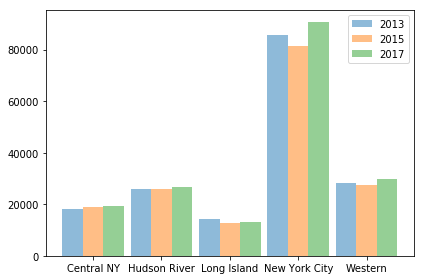

In [46]:
#define data
regions = ("Central NY", "Hudson River", "Long Island", "New York City", "Western")
regions_2013 = illness_by_region_2013["Mental Illness"].tolist()
regions_2015 = illness_by_region_2015["Mental Illness"].tolist()
regions_2017 = illness_by_region_2017["Mental Illness"].tolist()
n_groups = 5

#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8


plot_2013 = plt.bar(index - bar_width, regions_2013, bar_width, alpha=0.5, align='center', label = "2013")
plot_2015 = plt.bar(index, regions_2015, bar_width, alpha=0.5, align ='center', label = "2015")
plot_2017 = plt.bar(index + bar_width, regions_2017, bar_width, align='center', alpha=0.5, label = "2017")

plt.xticks(index, regions)
plt.legend()
plt.tight_layout()
plt.show()

As expected, we observe the greatest number of occurences in NYC opposed to other less populated regions